In [1]:
#Path finding algorithm using pandas 

In [2]:
#import relevent libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Define the start and end nodes 
start = (1,1)
end = (11,16)

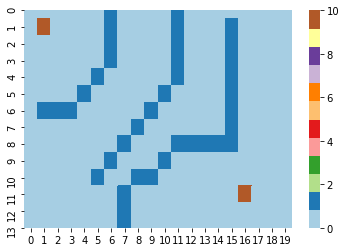

In [5]:
#The intial maze with 0 being the moveable area and 1 being the wall 
initial_maze = np.array([
    [0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
    [0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
] ,dtype = 'int')

#makes a copy of the maze such that each function can use its own iteration and not the original 
maze = initial_maze.copy()
#Shows the start and end points and sets up seaborn to show the maze graphically
maze[start[0]][start[1]] = 10
maze[end[0]][end[1]] = 10


current_palette = sns.color_palette()
sns.heatmap(maze,cmap = 'Paired')

In [6]:
#function that shows the node next to it with the direction of X and Y put in 
def nxt_node(node,Xdir,Ydir):
    nxt = [ int(node[0]+Xdir) , int(node[1]+Ydir) ]
    return nxt

#finds the distance between two vectors that are input as tuples 
def distance(vec_1,vec_2):
    dist = (vec_1[0] - vec_2[0])**2 + (vec_1[1] - vec_2[1])**2
    return np.sqrt(dist)

#Define an a* magnitude distance using initial and final points
def a_star_mag(start,end,vector):
    return [distance(start,vector) + distance(end,vector)]


In [7]:
#distance from start to end 
dist = distance(start,end)

#The new values the function finds that might be used for the path 
df_new = pd.DataFrame(np.array([[start[0],start[0],dist,start[0],start[0]]]),columns = ['X','Y','Dist','X_from','Y_from'])

#The shorter points that are expanded on and used in the path at the end 
df_posbl = pd.DataFrame(columns = ['X','Y','Dist','X_from','Y_from'])

#Initialises vec_short that is used to find the shortest vector 
vec_short = 0

#Function that builds out from shortest point to adjacent 
def next_point(nxt_node,maze,a_star_mag,start,end):

    #Make them global so the function can use them without reasigning them each time
    global df_new
    global df_posbl
    global vec_short
    
    #Sorts the values to be explored by distance
    df_new = df_new.sort_values(by = ['Dist'])
    
    #Shows the minimum a* min distance 
    min_dis = df_new['Dist'].iloc[0]
    
    #Finds the vector with the minimum a* mag distance 
    vec_short = df_new[df_new['Dist'] == min_dis].iloc[0]
    
    #Adds the new shortest vector to the dataframe of the possible path dataframe
    df_posbl = df_posbl.append(df_new[df_new['Dist'] == min_dis])
    
    #Make the new points on the data frame if point = 0 else if point = 1 its a boundry 
    #Distace to each point also included 
    a = nxt_node(vec_short,1,0)  
    a += a_star_mag(start,end,a) 
    
    b = nxt_node(vec_short,-1,0) 
    b += a_star_mag(start,end,b)
    
    c = nxt_node(vec_short,0,1)
    c += a_star_mag(start,end,c)
                 
    d = nxt_node(vec_short,0,-1)
    d += a_star_mag(start,end,d)
    
    #Locations that are being explored (5 so it can be seen on the final seaborn plot)
    maze[int(df_posbl['X'].iloc[-1])][int(df_posbl['Y'].iloc[-1])] = 5 
    
    #Drop shortest vector from the dataframe so it is not re used 
    df_new = df_new.sort_values(by = ['Dist'])
    df_new.drop([0],inplace = True)
    
    #Dataframe of new points and append to df_new and check to see if its the path dataframe
    #Checks if the point has already been identified 
    for i in [a,b,c,d]:
        
        #Shows which node the last node came from 
        i += [vec_short[0],vec_short[1]]
        
        #Checks to see if its the edge of the maze 
        if len(maze) < i[0]+1 or len(maze[0]) < i[1]+1 or i[0]<0 or i[1]<0:
            pass
        
        #Checks if the maze area is a wall  
        elif maze[i[0]][i[1]] == 1: 
            pass
        
        #Checks if the point has already been investigated on the path exploritory dataframe 
        elif df_posbl[['X','Y','Dist']].isin([i[0],i[1],i[2]]).all(axis = 1).any():
            pass
             
        #Adds each point to the Exploaritory dataframe 
        else:
            update_frame = pd.DataFrame(np.array([i]),columns = ['X','Y','Dist','X_from','Y_from'])
            df_new = df_new.append(update_frame) 
            #Shows these explored points on the map 
            maze[i[0]][i[1]] = 4
     
    #Makes sure there are no duplicate value
    df_new.drop_duplicates(inplace = True)
    
    #Resets the index ready to order it again and pick the next value on the next iteration using iloc
    df_posbl.reset_index(drop = True,inplace = True)
    df_new.reset_index(drop = True,inplace = True)
    
    

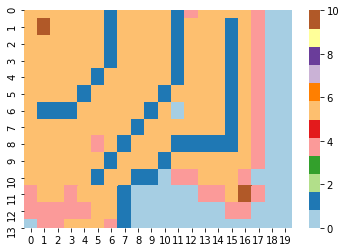

In [8]:
posbl_maze = initial_maze.copy()

#Initialises first point so rec_astar can use it as it can compare empty dataframes 
next_point(nxt_node,posbl_maze ,a_star_mag,start,end)

#Recursion of the next point function till the end value is found 
def rec_astar():
    global vec_short 
    if [vec_short['X'],vec_short['Y']] == [float(end[0]) , float(end[1])] :
        return posbl_maze
    else:
        next_point(nxt_node,posbl_maze ,a_star_mag,start,end)
        rec_astar()

#Run the funtion 
rec_astar()  

#Sets the start and end points on the map and shows the area the algorithm explored 
posbl_maze[start[0]][start[1]] = 10
posbl_maze[end[0]][end[1]] = 10
sns.heatmap(posbl_maze,cmap = 'Paired')

In [9]:
maze_fin = initial_maze.copy()

#Sets the start and end points on the map
maze_fin[start[0]][start[1]] = 10
maze_fin[end[0]][end[1]] = 10
back_node = vec_short

#While look going back through where the end point come from to get to start point
while tuple(back_node[['X_from','Y_from']]) != start:

    back_node = df_posbl[(df_posbl['X'] == back_node['X_from']) & (df_posbl['Y'] == back_node['Y_from'])]
    
    #iloc needed to make it the same dataframe dimensions as df_posbl to copare as vec_short uses this earlier
    back_node = back_node.iloc[0]
    
    #Updates the maze
    maze_fin[int(back_node['X'])][int(back_node['Y'])] = 7

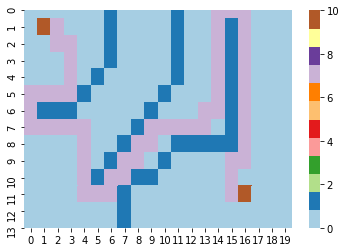

In [10]:
sns.heatmap(maze_fin,cmap = 'Paired')